In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import streamlit as st
import pickle

In [2]:
df = pd.read_csv("datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn - datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)
# df.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
# Check for values present in each column
# df.nunique(axis = 0)
df.agg(['count', 'size', 'nunique']) # nunique is what we are looking for

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7032,7043
size,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
nunique,7043,2,2,2,2,73,2,3,3,3,...,3,3,3,3,3,2,4,1585,6530,2


In [5]:
df_draft = df.copy()
df_draft.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Our dataframe contains objects floats and integers. We need numerical values for our model to work

lb_e = LabelEncoder()
for col in df_draft.columns:
    if (df_draft[col].dtype == 'object'):
        df_draft[col] = lb_e.fit_transform(df_draft[col])
df_draft.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [7]:
df_draft.agg(['nunique']).T

,nunique
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [8]:
# # ------- Q2 ----------------- 
# We need drop these two columns "gender, and customerID" since they don't reflect any use for the purpose of our model
df_draft = df_draft.drop(['customerID', 'gender'], axis=1)

In [9]:
# ---- Check columns with some empty values ----
# df_draft.columns[df_draft.isna().any()].tolist()
df_draft.isna().any()

SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [11]:
# Filling in missing values for the total charges column

data_change_average = df_draft['TotalCharges'].mean()
df_draft['TotalCharges'] = df_draft['TotalCharges'].fillna(data_change_average)
df_draft.isna().any()

SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [17]:
# Q1 ---- RELEVANT FEATURES THAT DEFINE A CUSTOMER CHURN. ---- #

# Fields in the dataset where customers churned
df_draft.columns.tolist()

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [18]:
# Q2 ---- FINDING WHERE OUR CUSTOMER CHURN A LOT ---- #

# Fields in the dataset where customers churned
df_customer_churn = df[df['Churn'] == 'Yes']
df_customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


<BarContainer object of 3 artists>

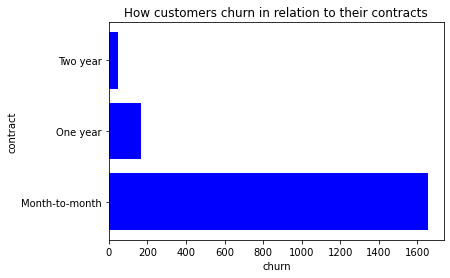

In [32]:
# Q2 ----

churn_in_time = df_customer_churn.pivot_table('Churn', index = 'Contract',aggfunc='count')
plt.title('How customers churn in relation to their contracts', fontsize=12, ha='center')
plt.xlabel('churn')
plt.ylabel("contract")
    
plt.barh(churn_in_time.index, churn_in_time['Churn'], color='blue', align='center')

In [33]:
X_axis = df_draft.drop('Churn',axis=1)
y_axis = df_draft['Churn']
X_train, X_test, y_train, y_test = train_test_split(X_axis, y_axis, test_size=0.2, random_state=0)

In [34]:
X_train.shape, X_test.shape

((5634, 18), (1409, 18))

In [35]:
X_train.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.011648,-0.211515,0.024983,0.006260,0.153026,-0.033277,-0.124191,-0.009495,-0.021781,-0.147333,0.033098,0.048368,-0.140327,0.158854,-0.041352,0.221910,0.108809
Partner,0.011648,1.000000,0.448693,0.379471,0.008843,0.150668,-0.015058,0.155789,0.150031,0.161665,0.123985,0.133787,0.129848,0.295461,-0.011840,-0.145220,0.098550,0.317143
Dependents,-0.211515,0.448693,1.000000,0.153859,-0.005128,-0.027347,0.034481,0.156011,0.090512,0.077592,0.135122,0.039236,0.018387,0.240529,-0.111633,-0.036630,-0.112570,0.059787
tenure,0.024983,0.379471,0.153859,1.000000,-0.001237,0.342647,-0.045737,0.319169,0.378211,0.367832,0.328898,0.289739,0.300064,0.671937,0.010568,-0.373725,0.250329,0.827455
PhoneService,0.006260,0.008843,-0.005128,-0.001237,1.000000,-0.021242,0.387374,-0.009057,0.025258,0.001930,-0.013081,0.036705,0.038851,-0.004311,0.016003,-0.010117,0.244650,0.107322
MultipleLines,0.153026,0.150668,-0.027347,0.342647,-0.021242,1.000000,-0.112080,0.004674,0.117428,0.118470,0.013581,0.170289,0.177631,0.109504,0.162970,-0.182118,0.431396,0.451795
InternetService,-0.033277,-0.015058,0.034481,-0.045737,0.387374,-0.112080,1.000000,-0.027078,0.028528,0.040380,-0.025491,0.100362,0.093692,0.084927,-0.143023,0.096224,-0.327216,-0.184609
OnlineSecurity,-0.124191,0.155789,0.156011,0.319169,-0.009057,0.004674,-0.027078,1.000000,0.183270,0.171491,0.282837,0.038073,0.052648,0.364104,-0.162457,-0.084382,-0.052774,0.251740
OnlineBackup,-0.009495,0.150031,0.090512,0.378211,0.025258,0.117428,0.028528,0.183270,1.000000,0.198415,0.197603,0.147697,0.147942,0.284239,-0.013982,-0.129641,0.120157,0.383157
DeviceProtection,-0.021781,0.161665,0.077592,0.367832,0.001930,0.118470,0.040380,0.171491,0.198415,1.000000,0.240268,0.278580,0.288864,0.349704,-0.042309,-0.138226,0.161480,0.386219


In [36]:
# Q3 ----  train an Extreme Gradient Boosting “XGBOOST” model ---- #

training_model=xgb.XGBClassifier(n_estimators=200,max_depth=5)
training_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# Q4 ----  the model’s accuracy ---- #

prediction_accuracy =training_model.predict(X_test)
accuracy_score(y_test.values, prediction_accuracy)

0.7778566359119943

In [38]:
pickle_file = open("customer_churn_xgbmodel.pkl", "wb") 
pickle.dump(model, pickle_file) 
pickle_file.close()